<a href="https://colab.research.google.com/github/AditiCoderElite/Car-Price-Prediction---Model-Evaluation/blob/main/Car_Price_Prediction_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction - Model Evaluation

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cars_df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/car-prices.csv")


car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']], index = cars_df.index)

cars_df['car_company'] = car_companies

cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'

cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'

cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'

cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'

cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)

cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])

cars_numeric_df.drop(columns = ['car_ID'], axis = 1, inplace = True)

words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
def num_map(series):
    return series.map(words_dict)

cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber', 'doornumber']].apply(num_map, axis = 1)

car_body_dummies = pd.get_dummies(cars_df['carbody'], dtype = int)

car_body_new_dummies = pd.get_dummies(cars_df['carbody'], drop_first = True, dtype = int)

cars_categorical_df = cars_df.select_dtypes(include = ['object'])

cars_dummies_df = pd.get_dummies(cars_categorical_df, drop_first = True, dtype = int)

cars_df.drop(list(cars_categorical_df.columns), axis = 1, inplace = True)

cars_df = pd.concat([cars_df, cars_dummies_df], axis = 1)

cars_df.drop('car_ID', axis = 1, inplace = True)

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cars_df, test_size = 0.3, random_state = 42)

features = list(cars_df.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

def standard_norm(series):
  series_mean = series.mean()
  series_std = series.std()
  new_series = (series - series_mean) / series_std
  return new_series

X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]].apply(standard_norm, axis = 0)

major_features = {}
for f in features:
  corr_coef = np.corrcoef(cars_df['price'], cars_df[f])[0, 1]
  if (corr_coef >= 0.5) or (corr_coef <= -0.5):
    major_features[f] = corr_coef

print("Number of features moderately to highly correlated with price =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 15 



<ipython-input-1-5b2d09ba062b>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
<ipython-input-1-5b2d09ba062b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]].apply(standard_norm, axis = 0)


{'wheelbase': 0.5778155982921496,
 'carlength': 0.6829200156779628,
 'carwidth': 0.7593252997415119,
 'curbweight': 0.8353048793372965,
 'cylindernumber': 0.7183049020002816,
 'enginesize': 0.8741448025245112,
 'boreratio': 0.5531732367984434,
 'horsepower': 0.8081388225362212,
 'citympg': -0.68575133602704,
 'highwaympg': -0.6975990916465566,
 'drivewheel_fwd': -0.6019502965330914,
 'drivewheel_rwd': 0.6389565386618764,
 'fuelsystem_2bbl': -0.5013743424965753,
 'fuelsystem_mpfi': 0.5170749892680737,
 'car_company_buick': 0.515094050057132}

---

#### Recursive Feature Elimination (RFE)


In [2]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


skl_lin_reg = LinearRegression()
rfe1 = RFE(skl_lin_reg, n_features_to_select=10)


rfe1.fit(X_train[major_features.keys()], y_train)


print(major_features.keys(), "\n") # List of features out of which 10 best featuers are to be selected by RFE.
print(rfe1.support_, "\n") # Array containing the boolean values
print(rfe1.ranking_, "\n") # Ranking of the features selected by RFE

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False  True  True  True  True  True  True  True False
 False  True  True] 

[5 3 1 4 1 1 1 1 1 1 1 6 2 1 1] 



In [3]:

import statsmodels.api as sm

rfe_features = X_train[major_features.keys()].columns[rfe1.support_]
X_train_rfe1 = X_train[rfe_features]

X_train_rfe1 = sm.add_constant(X_train_rfe1)


sm_lin_reg1 = sm.OLS(y_train, X_train_rfe1).fit()
print(sm_lin_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     91.03
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.16e-54
Time:                        10:36:38   Log-Likelihood:                -1336.8
No. Observations:                 143   AIC:                             2696.
Df Residuals:                     132   BIC:                             2728.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.412e+04    618.02

In [4]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,citympg,19.90
7,highwaympg,17.69
3,enginesize,10.13
2,cylindernumber,6.79
0,const,6.53
5,horsepower,6.06
4,boreratio,2.89
1,carwidth,2.50
8,drivewheel_fwd,2.14
9,fuelsystem_mpfi,2.07


In [5]:

# RFE with 5 features.
skl_lin_reg2 = LinearRegression()
rfe2 = RFE(skl_lin_reg2, n_features_to_select = 5)


rfe2.fit(X_train[major_features.keys()], y_train)


print(major_features.keys(), "\n")
print(rfe2.support_, "\n")
print(rfe2.ranking_, "\n")

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False False  True False  True False False  True False
 False False  True] 

[10  8  1  9  3  1  4  1  6  5  1 11  7  2  1] 



In [6]:

import statsmodels.api as sm


rfe_features = X_train[major_features.keys()].columns[rfe2.support_]
X_train_rfe2 = X_train[rfe_features]


X_train_rfe2 = sm.add_constant(X_train_rfe2)


sm_lin_reg2 = sm.OLS(y_train, X_train_rfe2).fit()
print(sm_lin_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.00e-58
Time:                        10:37:18   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.436e+04    427.39

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.18
3,horsepower,3.35
0,const,3.11
1,carwidth,2.16
4,drivewheel_fwd,1.49
5,car_company_buick,1.46


---

#### Final Features



In [8]:
X_train_final = X_train_rfe2.drop(columns = 'const')

sk_lin_reg_final = LinearRegression().fit(X_train_final, y_train)
y_train_pred = sk_lin_reg_final.predict(X_train_final)
y_train_pred[:10]

array([11614.67148027, 20805.93850454,  9737.85451687,  6747.05425956,
       16681.44092811,  6824.7936787 , 19864.14770684, 10931.14320868,
        7165.9828108 , 15535.30134   ])

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
print("Train set")
print('-' * 50)

train_r2_score = r2_score(y_train, y_train_pred)
train_adj_r2_score = 1 - (1 - train_r2_score) * (X_train_final.shape[0] - 1)/(X_train_final.shape[0] - X_train_final.shape[1] - 1)

print(f"R-squared = {train_r2_score:.3f}")
print(f"Adjusted R-squared = {train_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")

Train set
--------------------------------------------------
R-squared = 0.868
Adjusted R-squared = 0.863
Mean absolute error = 2080.494
Mean squared error = 8042954.083
Root mean squared error = 2836.010


---

#### Mean-Squared Log Error (MSLE)




In [10]:

import math as m
print(m.pow(2, 32))
print(m.log(4294967296, 2))

4294967296.0
32.0


In [11]:
print(f"Mean squared log error = {mean_squared_log_error(y_train, y_train_pred):.3f}")

Mean squared log error = 0.034


MSLE returns the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

It means that MSLE will treat small true and predicted values difference which will also be small approximately the same as big differences between large true and predicted values.

The MSLE is low which is good for our model.

---

#### Residual Analysis



Mean of residuals = 0.000



<ipython-input-12-e9694b6786ec>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_residuals, bins = 'sturges', label = f"Mean of residuals = {np.mean(train_residuals):.3f}\n")


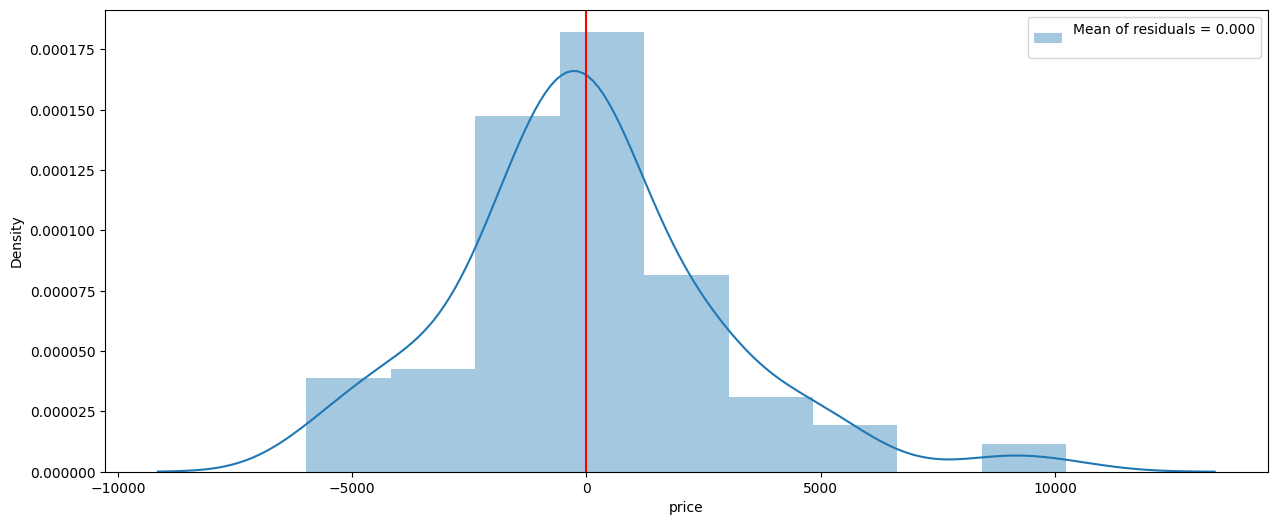

In [12]:
train_residuals = y_train - y_train_pred
print(f"Mean of residuals = {np.mean(train_residuals):.3f}\n")

plt.figure(figsize = (15, 6))
sns.distplot(train_residuals, bins = 'sturges', label = f"Mean of residuals = {np.mean(train_residuals):.3f}\n")
plt.axvline(x = np.mean(train_residuals), color = 'red')
plt.legend()
plt.show()

The mean of residuals is zero for the train set which is exactly what we want for a reliable linear regression model.



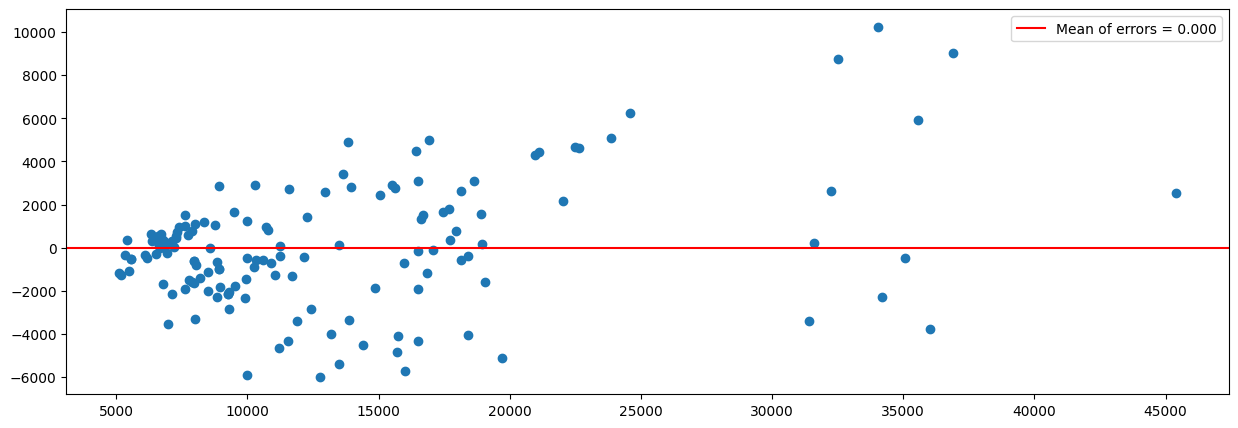

In [13]:

plt.figure(figsize = (15, 5))
plt.scatter(y_train, train_residuals)
plt.axhline(y = train_residuals.mean(), color = 'r', label = f'Mean of errors = {train_residuals.mean():.3f}')
plt.legend()
plt.show()

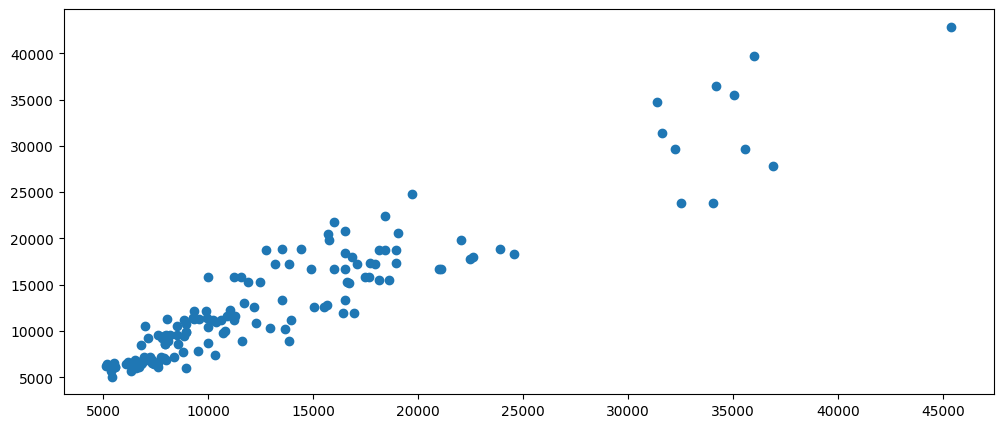

In [14]:
plt.figure(figsize = (12, 5))
plt.scatter(y_train, y_train_pred)
plt.show()

---

#### Prediction on Test Set



In [15]:
X_test = X_test[X_train_final.columns]
X_test.head()

,carwidth,enginesize,horsepower,drivewheel_fwd,car_company_buick
15,0.571482,1.939489,2.162700,0,0
9,1.056186,0.102198,1.579135,0,0
100,-0.252515,-0.156907,-0.091984,1,0
132,0.377600,-0.133352,0.252850,1,0
68,2.219476,1.327059,0.597684,0,1


In [16]:
y_test_pred = sk_lin_reg_final.predict(X_test)
y_test_pred[:10]

array([25551.02324283, 20149.47788471, 11279.52529162, 13225.58115796,
       31017.07788154,  6944.38671721,  7429.93375271,  7562.49609129,
       10510.58085045,  7276.13263097])

In [17]:
print("Test set")
print('-' * 50)

test_r2_score = r2_score(y_test, y_test_pred)
test_adj_r2_score = 1 - (1 - test_r2_score) * (X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)

print(f"R-squared = {test_r2_score:.3f}")
print(f"Adjusted R-squared = {test_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"\nMean squared log error = {mean_squared_log_error(y_test, y_test_pred):.3f}")

Test set
--------------------------------------------------
R-squared = 0.791
Adjusted R-squared = 0.772
Mean absolute error = 2566.663
Mean squared error = 14513862.919
Root mean squared error = 3809.706

Mean squared log error = 0.133


Mean of residuals = -694.585



<ipython-input-18-def36bd76750>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuals, bins = 'sturges', label = f"Mean of residuals = {np.mean(test_residuals):.3f}\n")


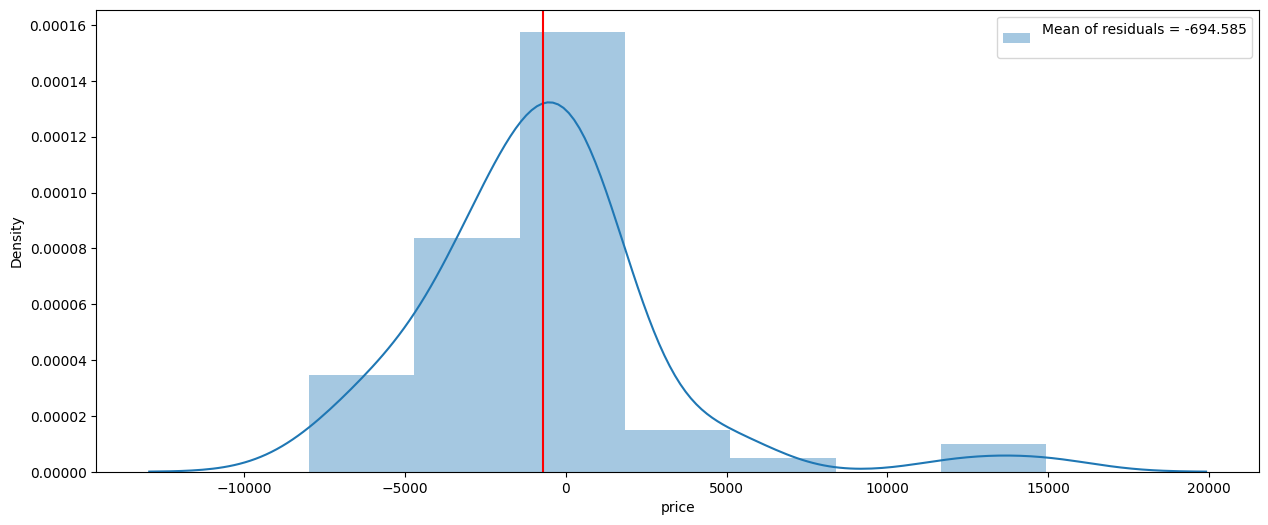

In [18]:
test_residuals = y_test - y_test_pred
print(f"Mean of residuals = {np.mean(test_residuals):.3f}\n")

plt.figure(figsize = (15, 6))
sns.distplot(test_residuals, bins = 'sturges', label = f"Mean of residuals = {np.mean(test_residuals):.3f}\n")
plt.axvline(x = np.mean(test_residuals), color = 'red')
plt.legend()
plt.show()

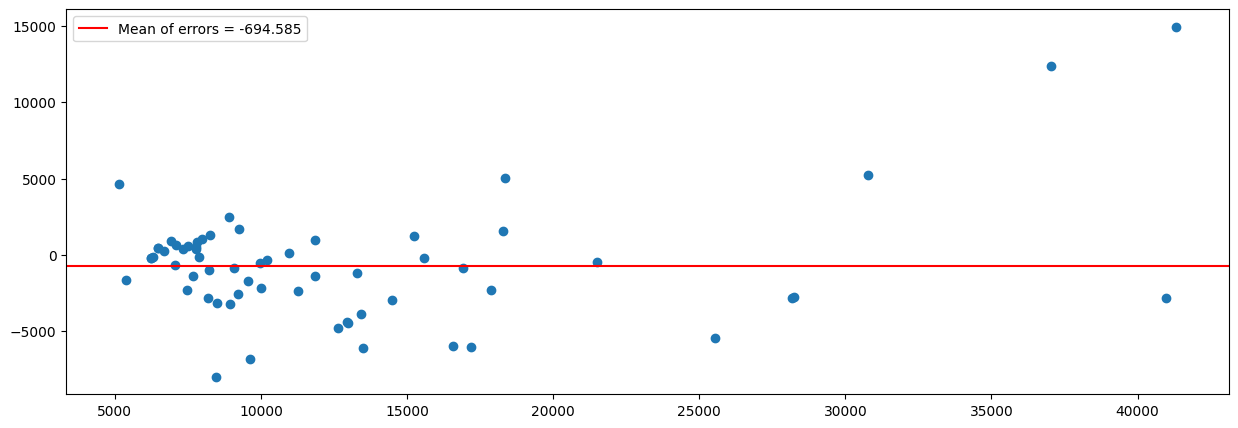

In [19]:
plt.figure(figsize = (15, 5))
plt.scatter(y_test, test_residuals)
plt.axhline(y = test_residuals.mean(), color = 'r', label = f'Mean of errors = {test_residuals.mean():.3f}')
plt.legend()
plt.show()

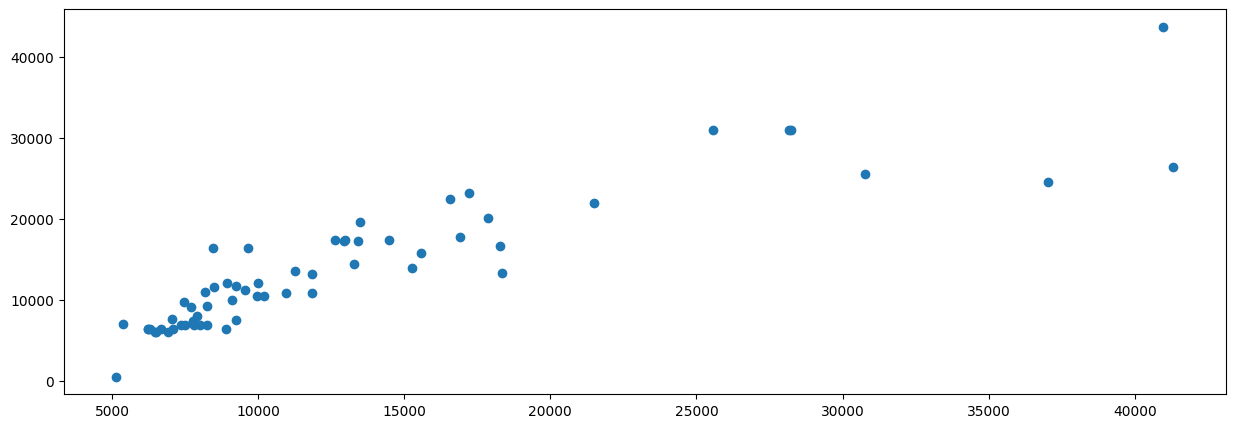

In [20]:
plt.figure(figsize = (15, 5))
plt.scatter(y_test, y_test_pred)
plt.show()

This scatter plot between the actual and predicted prices follow somewhat straight line which suggests that most of the predicted prices are close to the actual prices of a car.  

So finally the most important features and their corresponding regression coeffients are

|Feature|Coefficient|
|-|-|
|`carwidth`|1696.2271|
|`enginesize`|2636.6328|
|`horsepower`|2363.8354|
|`drivewheel_fwd`|-2016.6827|
|`car_company_buick`|7984.8761|

Hence, the regression equation is

$$Y = 14360 + 1696.2271x_1 + 2636.6328x_2 + 2363.8354x_3 - 2016.6827x_4 + 7984.8761x_5$$

where

- $Y$ is the price of a car

- $x_1$ is `carwidth`

- $x_2$ is `enginesize`

- $x_3$ is `horsepower`

- $x_4$ is `drivewheel_fwd`

- $x_5$ is `car_company_buick`

This concludes linear regression.

---